In [2]:
import pandas as pd


In [144]:
df = pd.read_csv('raw_data/Hourly_ada_utc_5Y.csv')
                 

In [145]:
df.head()

,date,rate,volume,cap,liquidity
0,2019-03-17 08:00:00,0.050135,38108704,1299846612,NaN
1,2019-03-17 09:00:00,0.050250,37892413,1302823254,NaN
2,2019-03-17 10:00:00,0.050258,36832720,1303039593,NaN
3,2019-03-17 11:00:00,0.050417,36580375,1307164879,NaN
4,2019-03-17 12:00:00,0.050620,35934610,1312436792,NaN


In [146]:
df.describe()

,rate,volume,cap,liquidity
count,43835.000000,4.383500e+04,4.383500e+04,3.859200e+04
mean,0.549341,7.123983e+08,1.789055e+10,5.138527e+07
std,0.608661,1.156685e+09,1.955736e+10,3.326753e+07
min,0.021576,1.403887e+07,5.594088e+08,6.088810e+05
25%,0.089718,9.711148e+07,2.344698e+09,1.300468e+07
50%,0.346178,2.615998e+08,1.186461e+10,5.799225e+07
75%,0.748289,7.967449e+08,2.554669e+10,6.952404e+07
max,3.092264,1.274004e+10,9.915734e+10,2.154124e+08


# add columns year, week, day
df[pd.to_datetime(pd.Series(df['date'])).dt.isocalendar().columns] = pd.to_datetime(pd.Series(df['date'])).dt.isocalendar()

In [147]:
df_add_fields = pd.to_datetime(df['date']).dt.isocalendar()

In [148]:
# add column hour
df['hour'] = pd.to_datetime(df['date']).dt.hour


In [149]:
df_hour = pd.to_datetime(df['date']).dt.hour

In [150]:
df[df_add_fields.columns] = df_add_fields

In [162]:
df

,date,rate,volume,cap,liquidity,hour,year,week,day
0,2019-03-17 08:00:00,0.050135,38108704,1299846612,NaN,8,2019,11,7
1,2019-03-17 09:00:00,0.050250,37892413,1302823254,NaN,9,2019,11,7
2,2019-03-17 10:00:00,0.050258,36832720,1303039593,NaN,10,2019,11,7
3,2019-03-17 11:00:00,0.050417,36580375,1307164879,NaN,11,2019,11,7
4,2019-03-17 12:00:00,0.050620,35934610,1312436792,NaN,12,2019,11,7
...,...,...,...,...,...,...,...,...,...
43830,2024-03-17 04:00:00,0.673697,878375451,24734542140,80960234.0,4,2024,11,7
43831,2024-03-17 05:00:00,0.669291,870431510,24572782537,76884464.0,5,2024,11,7
43832,2024-03-17 06:00:00,0.664984,860991181,24414659124,80552834.0,6,2024,11,7
43833,2024-03-17 07:00:00,0.647135,847987431,23759314785,80195126.0,7,2024,11,7


In [161]:
df[5244:].isnull().sum()

date         0
rate         0
volume       0
cap          0
liquidity    1
hour         0
year         0
week         0
day          0
dtype: int64

In [164]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [166]:
columns=["volume", "cap",]

In [167]:
scaler.fit_transform(df[columns])

array([[0.00189139, 0.00750967],
       [0.00187439, 0.00753986],
       [0.00179112, 0.00754205],
       ...,
       [0.06655291, 0.24194473],
       [0.06553109, 0.2352981 ],
       [0.06918837, 0.23526325]])

In [168]:
df[columns] = scaler.fit_transform(df[columns])

In [170]:
df['liquidity'].max()

215412411.0

In [163]:
df['cap'].max()

99157340145

<Axes: xlabel='date'>

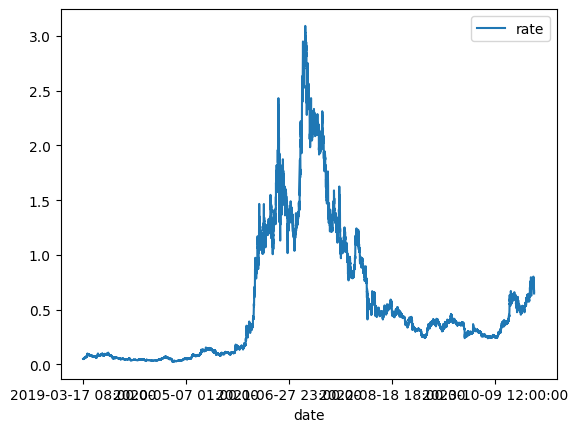

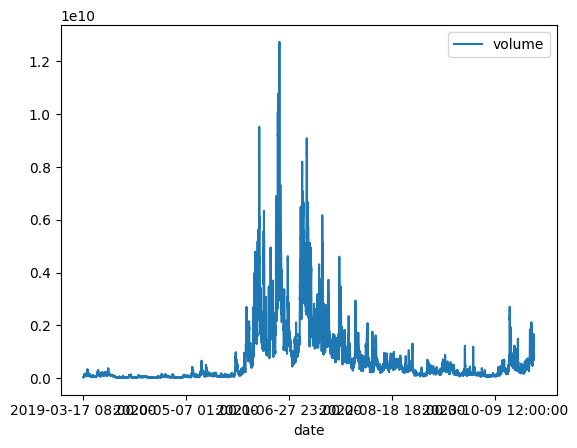

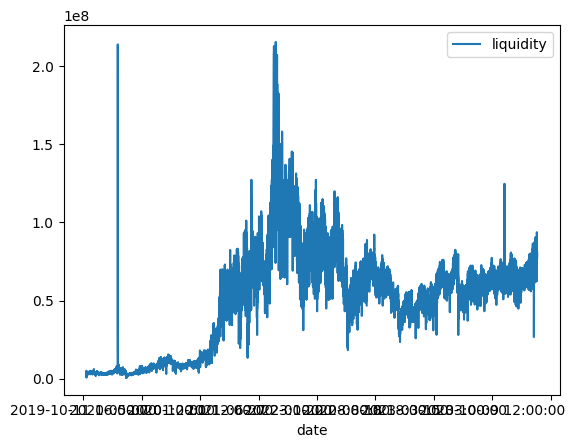

In [160]:
df.plot(x='date', y='rate')
df.plot(x='date', y='volume')
df.plot(x='date', y='liquidity')


<Axes: xlabel='date'>

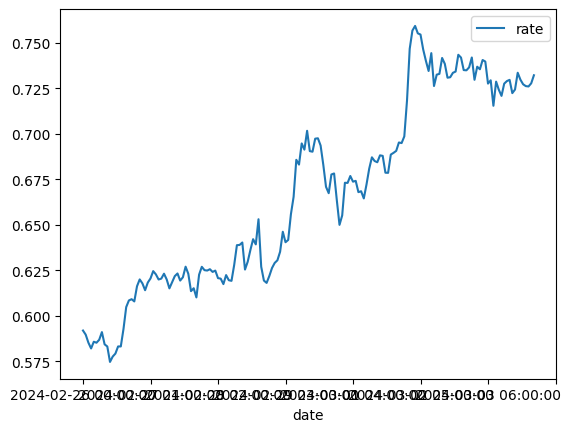

In [69]:
df[(df['week']==9) & (df['year']==2024)].plot(x='date', y=['rate'])


In [130]:
df

,date,rate,volume,cap,liquidity,hour,hour2
0,2019-03-17 08:00:00,0.050135,38108704,1299846612,NaN,8,8
1,2019-03-17 09:00:00,0.050250,37892413,1302823254,NaN,9,9
2,2019-03-17 10:00:00,0.050258,36832720,1303039593,NaN,10,10
3,2019-03-17 11:00:00,0.050417,36580375,1307164879,NaN,11,11
4,2019-03-17 12:00:00,0.050620,35934610,1312436792,NaN,12,12
...,...,...,...,...,...,...,...
43830,2024-03-17 04:00:00,0.673697,878375451,24734542140,80960234.0,4,4
43831,2024-03-17 05:00:00,0.669291,870431510,24572782537,76884464.0,5,5
43832,2024-03-17 06:00:00,0.664984,860991181,24414659124,80552834.0,6,6
43833,2024-03-17 07:00:00,0.647135,847987431,23759314785,80195126.0,7,7


<Axes: xlabel='date'>

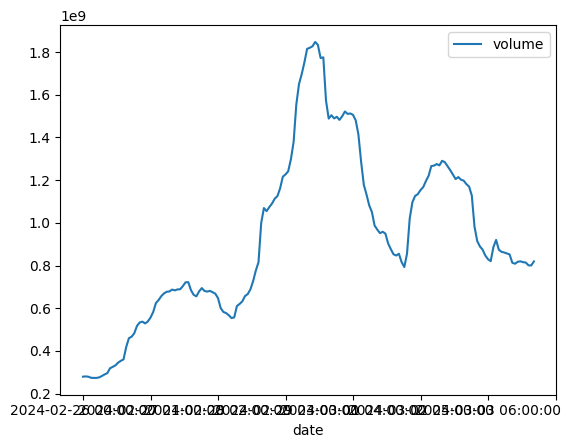

In [70]:
df[(df['week']==9) & (df['year']==2024)].plot(x='date', y=['volume'])

<Axes: xlabel='date'>

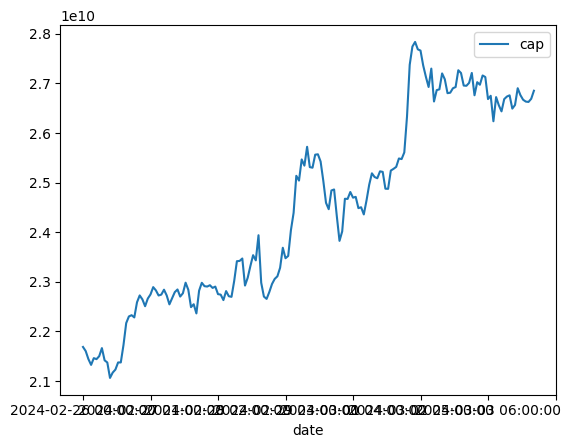

In [71]:
df[(df['week']==9) & (df['year']==2024)].plot(x='date', y=['cap'])

"   \nfor week in range(2,11):\n    df[(df['week']==week) & (df['year']==2024)].plot(x='date', y=['rate'],ax=axs[int((week-2)/3),int((week-2)%3)])\n    # df[(df['week']==week) & (df['year']==2024)].plot(x='date', y=['volume'],ax=axs[int((week-2)/3),int((week-2)%3)])\n    axs[int((week-2)/3),int((week-2)%3)].set_title('rate')\n\nfor week in range(2,11):\n    df[(df['week']==week) & (df['year']==2024)].plot(x='date', y=['cap'],ax=axs[int((week-2)/3),int((week-2)%3)])\n    # df[(df['week']==week) & (df['year']==2024)].plot(x='date', y=['volume'],ax=axs[int((week-2)/3),int((week-2)%3)])\n    axs[int((week-2)/3),int((week-2)%3)].set_title('cap')\n"

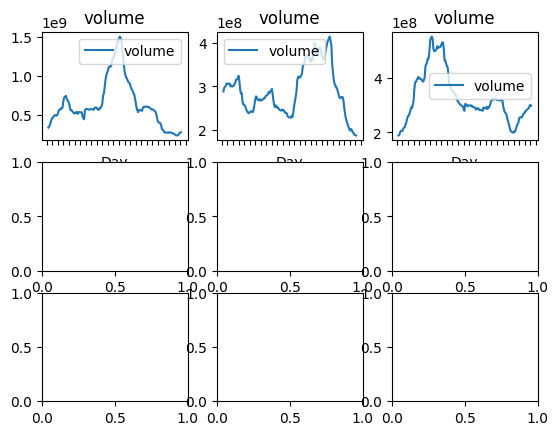

In [80]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, axs = plt.subplots(3,3)
for week in range(2,5):
    # df[(df['week']==week) & (df['year']==2024)].plot(x='date', y=['rate'],ax=axs[int((week-2)/3),int((week-2)%3)])
    df[(df['week']==week) & (df['year']==2024)].plot(x='date', y=['volume'],ax=axs[int((week-2)/3),int((week-2)%3)])
    axs[int((week-2)/3),int((week-2)%3)].set_title('volume')
    axs[int((week-2)/3),int((week-2)%3)].set_xlabel('Day')
    axs[int((week-2)/3),int((week-2)%3)].xaxis.set_major_locator(mdates.WeekdayLocator())
    axs[int((week-2)/3),int((week-2)%3)].xaxis.set_minor_locator(mdates.WeekdayLocator())
    
"""   
for week in range(2,11):
    df[(df['week']==week) & (df['year']==2024)].plot(x='date', y=['rate'],ax=axs[int((week-2)/3),int((week-2)%3)])
    # df[(df['week']==week) & (df['year']==2024)].plot(x='date', y=['volume'],ax=axs[int((week-2)/3),int((week-2)%3)])
    axs[int((week-2)/3),int((week-2)%3)].set_title('rate')

for week in range(2,11):
    df[(df['week']==week) & (df['year']==2024)].plot(x='date', y=['cap'],ax=axs[int((week-2)/3),int((week-2)%3)])
    # df[(df['week']==week) & (df['year']==2024)].plot(x='date', y=['volume'],ax=axs[int((week-2)/3),int((week-2)%3)])
    axs[int((week-2)/3),int((week-2)%3)].set_title('cap')
"""
    

In [103]:
start = int(pd.Timestamp(year=2024,month=1, day=1).timestamp())
end = int(pd.Timestamp(year=2024,month=2, day=1).timestamp())
# print (int(start.timestamp()), int(end.timestamp))


In [101]:
int(end.timestamp())

1706745600

In [105]:
import json 
payload = json.dumps({
    "currency": "USD",
    "code": "ADA",
    "start": start,
    "end": end,
    "meta": False
    })

In [106]:
payload

'{"currency": "USD", "code": "ADA", "start": 1704067200, "end": 1706745600, "meta": false}'

In [ ]:
def get_data_from_api_and_add_date_related_fields (start, end):
    """

    - read data from live_coin_watch via utils.py
    - add columns for year, week, weekday and hour to the dataframe

    """

    df = get_alot_of_data("2020-03-01 08:00:00", "2020-03-16 08:00:00")
    df = df.rename(columns={"date": "value_date"})

    # response = api_request(start, end)
    print (df.columns)
    df = df[pd.to_datetime(pd.Series(df['value_date'])).dt.isocalendar().columns] = \
            pd.to_datetime(pd.Series(df['value_date'])).dt.isocalendar()
    df['hour'] = pd.to_datetime(pd.Series(df['value_date'])).dt.hour



    print (df)
    print (df.columns)
